# scikit-Learn

머신러닝은
- 지도학습 (Supervised)
  * 라벨링 구성
    - 분류 (범주형)
    - 회귀 (연속형)
    - 예측 (미래형)
    
    
- 비지도학습 (unSupervised)
  * 라벨링 없음
    - 클러스터링 (군집화)
    - 차원 축소 (변수제거)
    
    
- 강화학습  (Reinforcement)
  * 학습하는 시스템을 Agent 라고 하고, 스스로 보상받고 벌을 회피하도록 행동하게 함
    - Monto Carlo Methods
    - Q-learning
    - Policy Gradient methods

으로 나뉜다

- 데이터의 크기, 품질 특성
- 가용 계산 시간
- 작업의 긴급성
- 목적

에 따라 세 가지 머신러닝 종류 중 하나를 선택하여 
고르면 된다

---
그 중에서도 우리가 쓰려는 Scikit-learn 은 대체 뭘까?

[싸이킷 런 공식 홈페이지](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

In [1]:
import sklearn
print(sklearn.__version__)

1.0


아래의 데이터로 Sklearn 에 대해 알아보자

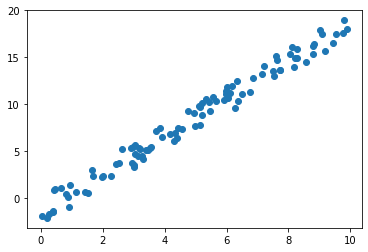

In [2]:
import numpy as np
import matplotlib.pyplot as plt
r = np.random.RandomState(10)
x = 10 * r.rand(100)
y = 2 * x - 3 * r.rand(100)
plt.scatter(x,y)

이 그림은 (x,y) 에 대한 그래프 자료이다. x는 0부터 10 사이의 랜덤한 100개의 수.  
y는 x를 2배한 값에 0에서 1 사이의 수를 랜덤하게 뺐다.

scikit-learn 에서는 randomforest, classify, regression 등 다양한 머신러닝 분석 기법을 제시하고 있다.  
우리는 LinearRegression 선형 회귀 를 써보도록 하자

## 모델 생성

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

우선 sklearn 라이브러리 내부에 있는 lenear_model 클래스에서
LinearRegression 함수를 꺼내오자

이는 LinearRegression 분석모델을 생성하는 함수이다

## 주의사항
sklearn 에 넣어 학습시키기 위해선, 행렬의 형태로 넣어야 한다.  
헌데 위 x의 값은 ndarray의 값으로서 배열의 형태이다. 그래서 np,reshape() 형태로 행렬로 변환하기로 했다.

In [7]:
X = x.reshape(100,1)

In [9]:
X

array([[7.71320643],
       [0.20751949],
       [6.33648235],
       [7.48803883],
       [4.98507012],
       [2.24796646],
       [1.98062865],
       [7.60530712],
       [1.69110837],
       [0.88339814],
       [6.85359818],
       [9.53393346],
       [0.03948266],
       [5.12192263],
       [8.12620962],
       [6.12526067],
       [7.21755317],
       [2.91876068],
       [9.17774123],
       [7.14575783],
       [5.42544368],
       [1.42170048],
       [3.7334076 ],
       [6.74133615],
       [4.41833174],
       [4.34013993],
       [6.17766978],
       [5.13138243],
       [6.50397182],
       [6.01038953],
       [8.05223197],
       [5.21647152],
       [9.08648881],
       [3.19236089],
       [0.90459349],
       [3.00700057],
       [1.13984362],
       [8.28681326],
       [0.46896319],
       [6.26287148],
       [5.47586156],
       [8.19286996],
       [1.9894754 ],
       [8.56850302],
       [3.51652639],
       [7.54647692],
       [2.95961707],
       [8.839

행렬의 형태로 바뀐 것이 확인됐으면, 이제 학습시킨다

In [10]:
model.fit(X,y)

LinearRegression()

In [11]:
x_new = np.linspace(-1, 11, 100)
X_new = x_new.reshape(100,1)
y_new = model.predict(X_new)

새로운 x_new (test 데이터) 로 얼마나 학습을 잘했는지 
.predict 메서드로 확인해본다.

모델의 성능평가 관련 메서드들은
sklearn.metrics 에 저장되어 있다.

회귀모델의 성능 평가 기준인 RMSE (Root Mean Square Error) 를 사용한다.

In [14]:
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(y,y_new))
print(error)

9.299028215052264


이를 그래프로 보면 다음과 같다


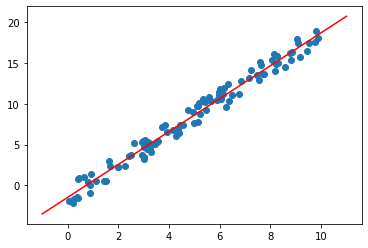

In [15]:
plt.scatter(x, y, label='input data')
plt.plot(X_new, y_new, color='red', label='regression line')